In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
wine=pd.read_csv("wine.csv")
wine.describe()
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.data=wine.iloc[:,1:]
wine.data.head()
WINE=wine.data.values
WINE

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine_normal=scale(WINE)

In [6]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
pca=PCA()
pca_values=pca.fit_transform(wine_normal)

In [10]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [11]:
pca=PCA(n_components=6)
pca_values=pca.fit_transform(wine_normal)

In [14]:
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823])

In [16]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 ])

In [17]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

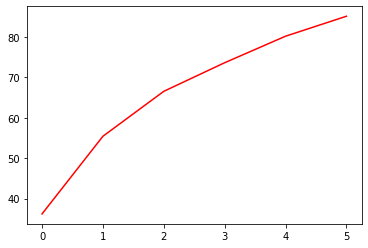

In [18]:
plt.plot(var1,color="red")

In [19]:
pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

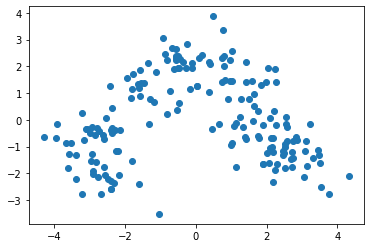

In [26]:
x=pca_values[:,0:1]
y=pca_values[:,1:2]
z=pca_values[:,2:3]
plt.scatter(x,y)

In [24]:
finaldf=pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']),wine[['Type']]],axis=1)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

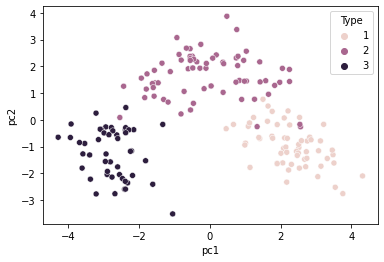

In [25]:
sn.scatterplot(data=finaldf,x='pc1',y='pc2',hue='Type')

In [27]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

In [28]:
wine_new=pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']),wine[['Type']]],axis=1)
wine_new

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [29]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [30]:
df_norm=norm_func(wine_new.iloc[:,0:])

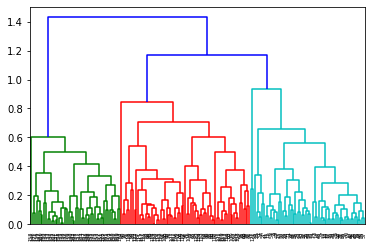

In [31]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [34]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [36]:
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [37]:
wine_new['h.Clusterid']=hc.labels_
wine_new

,pc1,pc2,pc3,Type,h.Clusterid
0,3.316751,-1.443463,-0.165739,1,2
1,2.209465,0.333393,-2.026457,1,2
2,2.516740,-1.031151,0.982819,1,2
3,3.757066,-2.756372,-0.176192,1,2
4,1.008908,-0.869831,2.026688,1,2
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,1
174,-2.601956,-1.757229,0.207581,3,1
175,-2.677839,-2.760899,-0.940942,3,1
176,-2.387017,-2.297347,-0.550696,3,1


In [38]:
#K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

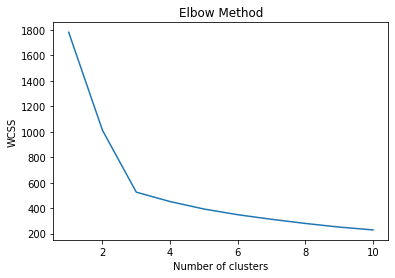

In [40]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_new)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(wine_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [43]:
clusters_new.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 1, 3, 1,
       1, 1, 3, 1, 3, 1, 3, 2, 1, 1, 1, 3, 1, 3, 1, 1, 3, 0, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [46]:
wine_new['clusterid_new'] = clusters_new.labels_

In [47]:
clusters_new.cluster_centers_

array([[-2.74392982e+00, -1.21419060e+00, -1.77245422e-01,
         2.97959184e+00,  9.79591837e-01],
       [ 7.62894930e-01,  1.99191249e+00, -4.02627050e-01,
         2.00000000e+00,  7.77156117e-16],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
         1.04838710e+00,  2.00000000e+00],
       [-9.36675724e-01,  1.51616403e+00,  6.43440599e-01,
         2.00000000e+00,  7.77156117e-16]])

In [49]:
wine_new.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,pc1,pc2,pc3,Type,h.Clusterid
,,mean,mean,mean,mean,mean
0,0,-2.743930,-1.214191,-0.177245,2.979592,0.979592
1,1,0.762895,1.991912,-0.402627,2.000000,0.000000
2,2,2.276194,-0.932054,0.001528,1.048387,2.000000
3,3,-0.936676,1.516164,0.643441,2.000000,0.000000


In [50]:
wine_new

,pc1,pc2,pc3,Type,h.Clusterid,clusterid_new
0,3.316751,-1.443463,-0.165739,1,2,2
1,2.209465,0.333393,-2.026457,1,2,2
2,2.516740,-1.031151,0.982819,1,2,2
3,3.757066,-2.756372,-0.176192,1,2,2
4,1.008908,-0.869831,2.026688,1,2,2
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,1,0
174,-2.601956,-1.757229,0.207581,3,1,0
175,-2.677839,-2.760899,-0.940942,3,1,0
176,-2.387017,-2.297347,-0.550696,3,1,0
